In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import pandas as pd
pd.set_option('display.max_rows', 1000)
import sys
from pathlib import Path

repo_dir = Path.cwd().parent.absolute()
sys.path.append(str(repo_dir))



In [3]:
from src.utils import setup_data_dir
from pathlib import Path
setup_data_dir()
data_dir = repo_dir / "data"

embedding_dir = data_dir / "GenePT_emebdding_v2"
ada_embedding_path = embedding_dir / "GenePT_gene_embedding_ada_text.pickle"
large_embedding_path = embedding_dir / "GenePT_gene_protein_embedding_model_3_text.pickle."

print("embedding_dir exists:", embedding_dir.exists())
print("ada_embedding_path exists:", ada_embedding_path.exists())
print("large_embedding_path exists:", large_embedding_path.exists())


File already exists at /Users/rj/personal/GenePT-tools/data/GenePT_emebdding_v2.zip
Extracting files...
Extracting GenePT_emebdding_v2/
Skipping GenePT_emebdding_v2/NCBI_UniProt_summary_of_genes.json - already exists with same size
Skipping GenePT_emebdding_v2/GenePT_gene_embedding_ada_text.pickle - already exists with same size
Skipping GenePT_emebdding_v2/GenePT_gene_protein_embedding_model_3_text.pickle. - already exists with same size
Skipping GenePT_emebdding_v2/NCBI_summary_of_genes.json - already exists with same size
Extraction complete!
Setup finished!
embedding_dir exists: True
ada_embedding_path exists: True
large_embedding_path exists: True


In [4]:
from src.utils import get_gene_embeddings
# gene_embedding = get_gene_embeddings("text-embedding-ada-002")
# gene_embedding = get_gene_embeddings("text-embedding-3-large")
gene_embedding = pd.read_parquet(data_dir / "generated/embeddings/embedding_associations_age_drugs_pathways_openai_large.parquet")


In [5]:
from src.utils import download_file, extract_gz
import pandas as pd
gene_sums_gz = download_file("https://duffel.rail.bio/recount3/human/data_sources/sra/gene_sums/38/SRP174638/sra.gene_sums.SRP174638.G026.gz")
gene_sums_path = extract_gz(gene_sums_gz)
gene_sums_df = pd.read_csv(str(gene_sums_path), sep="\t", comment='#')
gene_sums_df['gene_id_short'] = gene_sums_df.gene_id.str.split('.').str[0]
gene_sums_df.head()

File already exists at /Users/rj/personal/GenePT-tools/data/sra.gene_sums.SRP174638.G026.gz
Skipping sra.gene_sums.SRP174638.G026.gz - already exists with same size


,gene_id,SRR8376900,SRR8377100,SRR8376800,SRR8376700,SRR8377000,SRR8377101,SRR8376901,SRR8377001,SRR8376701,...,SRR8376798,SRR8376998,SRR8377098,SRR8376898,SRR8377099,SRR8376699,SRR8376999,SRR8376899,SRR8376799,gene_id_short
0,ENSG00000278704.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000278704
1,ENSG00000277400.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000277400
2,ENSG00000274847.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000274847
3,ENSG00000277428.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000277428
4,ENSG00000276256.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000276256


In [6]:
from datasets import load_dataset

gene_info_table_dataset = load_dataset("honicky/genept-composable-embeddings-source-data", "gene_info")
gene_info_table = gene_info_table_dataset['train'].to_pandas()
gene_info_table.head()


/Users/rj/personal/GenePT-tools/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,gene_name,ensembl_id,gene_type
0,TSPAN6,ENSG00000000003,protein_coding
1,TNMD,ENSG00000000005,protein_coding
2,DPM1,ENSG00000000419,protein_coding
3,SCYL3,ENSG00000000457,protein_coding
4,C1orf112,ENSG00000000460,protein_coding


In [7]:
gene_sums_df.shape

(63856, 495)

In [8]:
gene_sums_with_names = gene_sums_df.merge(gene_info_table, left_on='gene_id_short', right_on='ensembl_id', how='left')
gene_sums_with_names


,gene_id,SRR8376900,SRR8377100,SRR8376800,SRR8376700,SRR8377000,SRR8377101,SRR8376901,SRR8377001,SRR8376701,...,SRR8376898,SRR8377099,SRR8376699,SRR8376999,SRR8376899,SRR8376799,gene_id_short,gene_name,ensembl_id,gene_type
0,ENSG00000278704.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,ENSG00000278704,BX004987.1,ENSG00000278704,protein_coding
1,ENSG00000277400.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,ENSG00000277400,AC145212.2,ENSG00000277400,protein_coding
2,ENSG00000274847.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,ENSG00000274847,MAFIP,ENSG00000274847,protein_coding
3,ENSG00000277428.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,ENSG00000277428,Y_RNA,ENSG00000277428,misc_RNA
4,ENSG00000276256.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,ENSG00000276256,LOC389831,ENSG00000276256,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67942,ENSG00000124334.17_PAR_Y,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,ENSG00000124334,IL9R,ENSG00000124334,protein_coding
67943,ENSG00000185203.12_PAR_Y,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,ENSG00000185203,WASIR1,ENSG00000185203,antisense
67944,ENSG00000270726.6_PAR_Y,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,ENSG00000270726,AJ271736.10,ENSG00000270726,processed_transcript
67945,ENSG00000182484.15_PAR_Y,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,ENSG00000182484,WASH6P,ENSG00000182484,pseudogene


In [9]:
print("Total genes in gene_sums_with_names:", len(gene_sums_with_names))
print("Total distinct genes in gene_sums_with_names:", len(gene_sums_with_names.gene_name.unique()))
print("Total genes with embeddings:", gene_sums_with_names.gene_name.apply(lambda x: x in gene_embedding.index).sum())

print("total embeddings:", gene_embedding.shape[0])


Total genes in gene_sums_with_names: 67947
Total distinct genes in gene_sums_with_names: 60399
Total genes with embeddings: 34642
total embeddings: 33703


In [10]:
metadata_gz = download_file("https://duffel.rail.bio/recount3/human/data_sources/sra/metadata/38/SRP174638/sra.sra.SRP174638.MD.gz")
metadata_path = extract_gz(metadata_gz)
metadata_df = pd.read_csv(str(metadata_path), sep="\t", comment='#')
metadata_df.columns

File already exists at /Users/rj/personal/GenePT-tools/data/sra.sra.SRP174638.MD.gz
Skipping sra.sra.SRP174638.MD.gz - already exists with same size


Index(['rail_id', 'external_id', 'study', 'sample_acc', 'experiment_acc',
       'submission_acc', 'submission_center', 'submission_lab', 'study_title',
       'study_abstract', 'study_description', 'experiment_title',
       'design_description', 'sample_description', 'library_name',
       'library_strategy', 'library_source', 'library_selection',
       'library_layout', 'paired_nominal_length', 'paired_nominal_stdev',
       'library_construction_protocol', 'platform_model', 'sample_attributes',
       'experiment_attributes', 'spot_length', 'sample_name', 'sample_title',
       'sample_bases', 'sample_spots', 'run_published', 'size',
       'run_total_bases', 'run_total_spots', 'num_reads', 'num_spots',
       'read_info', 'run_alias', 'run_center_name', 'run_broker_name',
       'run_center'],
      dtype='object')

In [11]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
print(metadata_df.loc[0])

rail_id                                                                    4825260
external_id                                                             SRR8376682
study                                                                    SRP174638
sample_acc                                                              SRS4193085
experiment_acc                                                          SRX5186683
submission_acc                                                           SRA827571
submission_center                                                              GEO
submission_lab                                                                 NaN
study_title                      Cell type-specific immune phenotypes predict l...
study_abstract                   Peripheral blood samples were collected from c...
study_description                                                              NaN
experiment_title                 GSM3533991: lib823 [ABATE_001010_21]; Homo sap...
desi

In [12]:
metadata_df.sample_attributes.iloc[0]

'age at enrollment;;14.4|ethnicity;;Not Hispanic or Latino|library batch;;Fisher_BRI|race;;White|rate of c-peptide change;;-0.600512178281894|Sex;;male|source_name;;whole blood|subject;;ABATE_001010|visit day;;467'

In [13]:
experiment_ids = gene_sums_with_names.columns[gene_sums_with_names.columns.str.contains('SRR')]
experiment_ids

Index(['SRR8376900', 'SRR8377100', 'SRR8376800', 'SRR8376700', 'SRR8377000',
       'SRR8377101', 'SRR8376901', 'SRR8377001', 'SRR8376701', 'SRR8376801',
       ...
       'SRR8376698', 'SRR8376798', 'SRR8376998', 'SRR8377098', 'SRR8376898',
       'SRR8377099', 'SRR8376699', 'SRR8376999', 'SRR8376899', 'SRR8376799'],
      dtype='object', length=493)

In [14]:
from src.recount3_utils import parse_attributes
sample_attributes_df = parse_attributes(metadata_df, "external_id", "sample_attributes")
# There is one sample with no visit day. Since its only one sample, we drop it.   
sample_attributes_df = (
    sample_attributes_df[~sample_attributes_df['visit day'].isna()]
    .astype({
        'age at enrollment': float,
        'rate of c-peptide change': float,
        'lymphocyte percent': float,
        'neutrophil percent': float,
        'visit day': int
    })
    .set_index('external_id')
)


In [15]:
sample_attributes_df.dtypes


age at enrollment           float64
ethnicity                    object
library batch                object
race                         object
rate of c-peptide change    float64
Sex                          object
source_name                  object
subject                      object
visit day                     int64
lymphocyte percent          float64
neutrophil percent          float64
dtype: object

In [16]:

sample_attributes_df.head()

,age at enrollment,ethnicity,library batch,race,rate of c-peptide change,Sex,source_name,subject,visit day,lymphocyte percent,neutrophil percent
external_id,,,,,,,,,,,
SRR8376682,14.4,Not Hispanic or Latino,Fisher_BRI,White,-0.600512,male,whole blood,ABATE_001010,467,NaN,NaN
SRR8376683,8.5,Not Hispanic or Latino,Fisher_BRI,White,-1.831317,male,whole blood,ABATE_002001,332,NaN,NaN
SRR8376684,12.1,Not Hispanic or Latino,Fisher_BRI,White,-2.430716,female,whole blood,ABATE_002004,367,NaN,NaN
SRR8376685,12.4,Not Hispanic or Latino,Fisher_BRI,White,-1.512915,female,whole blood,ABATE_002012,370,NaN,NaN
SRR8376686,13.2,Not Hispanic or Latino,Fisher_BRI,White,-0.568527,male,whole blood,ABATE_003003,368,NaN,NaN


In [17]:
from src.inference import create_gene_embedding_matrix

lookup_embed = create_gene_embedding_matrix(
    gene_sums_with_names.gene_name, 
    gene_embedding
)

Unable to match 33305 out of 67947 genes in the GenePT-w embedding


In [18]:
lookup_embed.shape

(67947, 3072)

In [19]:
from src.inference import gene_pt_w_embedding
genePT_w_emebed = gene_pt_w_embedding(gene_sums_with_names, experiment_ids, gene_embedding)

Unable to match 33305 out of 67947 genes in the GenePT-w embedding


In [20]:
sample_attributes_df.drop(columns=['library batch', 'source_name'], inplace=True)
sample_attributes_df.head()

,age at enrollment,ethnicity,race,rate of c-peptide change,Sex,subject,visit day,lymphocyte percent,neutrophil percent
external_id,,,,,,,,,
SRR8376682,14.4,Not Hispanic or Latino,White,-0.600512,male,ABATE_001010,467,NaN,NaN
SRR8376683,8.5,Not Hispanic or Latino,White,-1.831317,male,ABATE_002001,332,NaN,NaN
SRR8376684,12.1,Not Hispanic or Latino,White,-2.430716,female,ABATE_002004,367,NaN,NaN
SRR8376685,12.4,Not Hispanic or Latino,White,-1.512915,female,ABATE_002012,370,NaN,NaN
SRR8376686,13.2,Not Hispanic or Latino,White,-0.568527,male,ABATE_003003,368,NaN,NaN


In [21]:

joined_df = sample_attributes_df.merge(genePT_w_emebed, left_index=True, right_index=True, how='inner')
print(f"sample_attributes_df shape: {sample_attributes_df.shape}")
print(f"normalized_embeddings_df shape: {genePT_w_emebed.shape}")
print(f"joined_df shape: {joined_df.shape}")



sample_attributes_df shape: (492, 9)
normalized_embeddings_df shape: (493, 3072)
joined_df shape: (492, 3081)


In [22]:
import plotly.express as px

px.histogram(joined_df['age at enrollment'].sort_values())

In [23]:
# Create a bar chart showing sample counts per subject using plotly
subject_counts = joined_df.groupby('subject').size().reset_index(name='count')

fig = px.bar(
    subject_counts,
    x='subject',
    y='count',
    title='Number of Samples per Subject',
    labels={
        'count': 'Number of Samples',
        'subject': 'Subject ID',
    },
    height=600
)

fig.update_layout(
    xaxis_tickangle=-45,
    showlegend=False,
    margin=dict(r=50)  # Reduced right margin since we don't have a legend
)

fig.show()

In [24]:
feature_df = joined_df.copy()
feature_df['ethnicity'] = pd.Categorical(joined_df.ethnicity).codes
feature_df['race'] = pd.Categorical(joined_df.race).codes
feature_df['sex'] = pd.Categorical(joined_df.Sex).codes
feature_df['age'] = feature_df['age at enrollment']
feature_df.drop(columns=['age at enrollment', 'Sex'], inplace=True)
feature_df.head()


,ethnicity,race,rate of c-peptide change,subject,visit day,lymphocyte percent,neutrophil percent,0,1,2,...,3064,3065,3066,3067,3068,3069,3070,3071,sex,age
SRR8376682,1,6,-0.600512,ABATE_001010,467,NaN,NaN,-0.014561,0.007347,-0.006341,...,0.028611,-0.016203,0.007092,-0.013737,0.023785,-0.005319,-0.006966,-0.012540,1,14.4
SRR8376683,1,6,-1.831317,ABATE_002001,332,NaN,NaN,-0.013646,0.007889,-0.006470,...,0.028639,-0.016014,0.006566,-0.013850,0.023547,-0.005186,-0.007312,-0.013446,1,8.5
SRR8376684,1,6,-2.430716,ABATE_002004,367,NaN,NaN,-0.014409,0.007136,-0.006426,...,0.028415,-0.016256,0.006832,-0.013776,0.023798,-0.005355,-0.006960,-0.012720,0,12.1
SRR8376685,1,6,-1.512915,ABATE_002012,370,NaN,NaN,-0.013794,0.008102,-0.006457,...,0.028373,-0.015808,0.006523,-0.014134,0.023680,-0.005299,-0.007386,-0.013526,0,12.4
SRR8376686,1,6,-0.568527,ABATE_003003,368,NaN,NaN,-0.014449,0.007338,-0.006535,...,0.029070,-0.016389,0.006747,-0.013474,0.023740,-0.005061,-0.007116,-0.012467,1,13.2


In [25]:
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt

# Convert all column names to strings before applying PCA
# features_24_weeks_df.columns = features_24_weeks_df.columns.astype(str)

# Now run PCA
# pca = PCA(n_components=50)
# pca_embeddings = pca.fit_transform(features_24_weeks_df.drop(columns=['drug dose', 'external_id', 'ifn status', "subject sex", "subject age", "subject_id"]))
# Then apply UMAP to the PCA results
reducer = umap.UMAP(random_state=42)
umap_embeddings = reducer.fit_transform(feature_df.drop(columns=['subject', 'age', 'ethnicity', 'race', 'sex', 'lymphocyte percent', 'neutrophil percent', 'visit day', 'rate of c-peptide change']))

# Create a DataFrame with the UMAP coordinates using the original DataFrame's index
umap_df = pd.DataFrame(umap_embeddings, 
                      columns=['UMAP1', 'UMAP2'], 
                      index=feature_df.index)  # Use the original DataFrame's index

# Merge with sample attributes to get metadata for coloring
umap_df = umap_df.merge(feature_df[['sex', 'age']], 
                       left_index=True, 
                       right_index=True)
# Create the plot
fig = px.scatter(umap_df, x='UMAP1', y='UMAP2', color='age', opacity=0.7,
                 title='UMAP Visualization of Gene Expression Embeddings')

# Update layout
fig.update_layout(
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()

/Users/rj/personal/GenePT-tools/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/rj/personal/GenePT-tools/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [26]:
X = feature_df.copy()
X.columns = X.columns.astype(str)
y = X['age']
X.drop(columns=['age'], inplace=True)
embedding_features_indicator = pd.Series([isinstance(x, int) for x in X.columns])

print("Shape of embedding features indicator:", embedding_features_indicator.shape)
print("Shape of filtered features matrix:", X.shape)


Shape of embedding features indicator: (3080,)
Shape of filtered features matrix: (492, 3080)


In [27]:
def balanced_bootstrap_sample(X, y, n_per_age=None):
    """
    Create a balanced bootstrap sample weighted by inverse age prevalence
    
    Args:
        X: Features dataframe
        y: Target age values
        n_per_age: Optional number of samples per age group. If not specified,
                  will use total samples divided by number of age groups.
        
    Returns:
        X_resampled, y_resampled: Resampled features and targets with balanced age distribution
    """
    # Get unique ages and their counts
    age_counts = y.value_counts()
    
    # Calculate default n_per_age if not specified
    if n_per_age is None:
        n_per_age = age_counts.max()
        
    resampled_indices = []
    
    # Sample indices for each age group
    for age in age_counts.index:
        # Get indices for this age
        age_indices = y[y == age].index
        
        # Sample with replacement to get n_per_age samples
        sampled_indices = np.random.choice(age_indices, size=n_per_age, replace=True)
        resampled_indices.extend(sampled_indices)
    
    # Get resampled data using indices
    X_resampled = X.loc[resampled_indices].copy()
    y_resampled = y.loc[resampled_indices].copy()
    
    return X_resampled, y_resampled

# # Create balanced dataset
# X_balanced, y_balanced = balanced_bootstrap_sample(X, y, X.SUBJID)

# print("Original age distribution:")
# print(y.value_counts().sort_index())
# print("\nBalanced age distribution:")
# print(y_balanced.value_counts().sort_index())


In [30]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from lightgbm import LGBMRegressor, Dataset
from sklearn.model_selection import GroupKFold
from imblearn.over_sampling import SMOTENC

# Set up GroupKFold cross-validation
n_splits = 5
group_kfold = GroupKFold(n_splits=n_splits)
seed = 42

# Initialize storage for regression metrics
mse_scores = []
r2_scores = []
feature_importances = []

# Perform grouped cross-validation
for train_idx, val_idx in group_kfold.split(X, y, groups=X.subject):
    X_train, X_val = X.drop(columns=['subject']).iloc[train_idx], X.drop(columns=['subject']).iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    train_data = Dataset(
        X_train, 
        label=y_train,
        # params={'categorical_feature': ['subject', 'ethnicity', 'race', 'sex',]}
    )
    val_data = Dataset(
        X_val, 
        label=y_val,
        # params={'categorical_feature': ['subject', 'ethnicity', 'race', 'sex',]}
    )
    
    lgb = LGBMRegressor(
        random_state=seed,
    )
    lgb.fit(X_train, y_train)

    # Make predictions
    y_pred = lgb.predict(X_val)
    
    # Store feature importances
    feature_importances.append(lgb.feature_importances_)
    
    # Calculate regression metrics
    # mse = mean_squared_error(y_val, np.round(y_pred))
    # r2 = r2_score(y_val, np.round(y_pred))
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    mse_scores.append(mse)
    r2_scores.append(r2)

print(f"Mean MSE: {np.mean(mse_scores):.4f} (+/- {np.std(mse_scores):.4f})")
print(f"Mean R2: {np.mean(r2_scores):.4f} (+/- {np.std(r2_scores):.4f})")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 405792
[LightGBM] [Info] Number of data points in the train set: 393, number of used features: 3079
[LightGBM] [Info] Start training from score 18.395674
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(all_y_val, all_y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f"{(i+2)*10}-{(i+3)*10-1}" for i in range(len(cm))],
            yticklabels=[f"{(i+2)*10}-{(i+3)*10-1}" for i in range(len(cm))])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

NameError: name 'all_y_val' is not defined

In [30]:

correlations = {
    embedding: avg_feature_importance[embedding_features_indicator].dot(gene_embedding.loc[embedding])
    for embedding in gene_embedding.index
}

abs_correlations = {
    embedding: avg_feature_importance[embedding_features_indicator].dot(np.abs(gene_embedding.loc[embedding]))
    for embedding in gene_embedding.index
}


NameError: name 'avg_feature_importance' is not defined

In [359]:
correlations_series = pd.Series(correlations)
correlations_series.sort_values(ascending=False, inplace=True)

# Convert dictionary to pandas Series and sort
abs_correlations_series = pd.Series(abs_correlations)
abs_correlations_series.sort_values(ascending=False, inplace=True)

<Axes: >

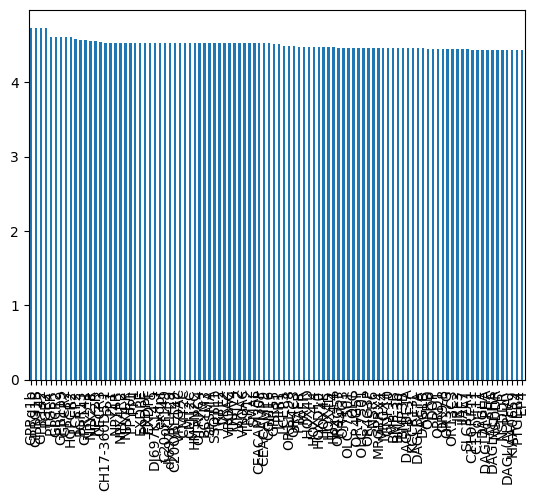

In [264]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# Prepare the data
X = normalized_embeddings_df.merge(
    sample_attributes_df[['external_id', 'ifn status']], 
    left_index=True, right_on='external_id'
)

# Filter out NA values and keep only High/Low
mask = X['ifn status'].isin(['High', 'Low'])
X_filtered = X[mask]
y = X_filtered['ifn status']
X_filtered = X_filtered.drop(['external_id', 'ifn status'], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y, test_size=0.3, random_state=42, stratify=y
)

# Train Random Forest
print("Random Forest Results:")
print("-" * 50)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

# Train LightGBM
print("\nLightGBM Results:")
print("-" * 50)
lgb = LGBMClassifier(
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    num_leaves=31
)
lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)
print(classification_report(y_test, y_pred_lgb))

# Print top 10 important features for both models
print("\nTop 10 Important Features (Random Forest):")
importance_rf = pd.DataFrame({
    'feature': X_filtered.columns,
    'importance': rf.feature_importances_
})
print(importance_rf.nlargest(10, 'importance'))

print("\nTop 10 Important Features (LightGBM):")
importance_lgb = pd.DataFrame({
    'feature': X_filtered.columns,
    'importance': lgb.feature_importances_
})
print(importance_lgb.nlargest(10, 'importance'))

Random Forest Results:
--------------------------------------------------
              precision    recall  f1-score   support

        High       0.95      0.90      0.93        70
         Low       0.85      0.93      0.89        43

    accuracy                           0.91       113
   macro avg       0.90      0.92      0.91       113
weighted avg       0.92      0.91      0.91       113


LightGBM Results:
--------------------------------------------------
[LightGBM] [Info] Number of positive: 99, number of negative: 164
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 270536
[LightGBM] [Info] Number of data points in the train set: 263, number of used features: 3072
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376426 -> initscore=-0.504747
[LightGBM] [Info] Start training from score -0.504747
[LightGBM] [Warning] No further splits

In [149]:
# from src.recount3_utils import create_rse_manual
# rse = create_rse_manual("SRP150872", "data_sources/sra", "human", "gencode_v26", "gene")
# rse.head()


,gene_id,external_id,counts,rail_id,study,sample_acc,experiment_acc,submission_acc,submission_center,submission_lab,...,run_center,drug dose,drug exposure,ifn status,recruitment site,source_name,subject age,subject sex,timepoint,tissue
0,ENSG00000278704.1,SRR7368000,0,1572883,SRP150872,SRS3436857,SRX4240949,SRA725005,GEO,NaN,...,NaN,50mg,1,High,1123,Whole blood,34,Female,12,Whole blood
1,ENSG00000277400.1,SRR7368000,0,1572883,SRP150872,SRS3436857,SRX4240949,SRA725005,GEO,NaN,...,NaN,50mg,1,High,1123,Whole blood,34,Female,12,Whole blood
2,ENSG00000274847.1,SRR7368000,0,1572883,SRP150872,SRS3436857,SRX4240949,SRA725005,GEO,NaN,...,NaN,50mg,1,High,1123,Whole blood,34,Female,12,Whole blood
3,ENSG00000277428.1,SRR7368000,0,1572883,SRP150872,SRS3436857,SRX4240949,SRA725005,GEO,NaN,...,NaN,50mg,1,High,1123,Whole blood,34,Female,12,Whole blood
4,ENSG00000276256.1,SRR7368000,0,1572883,SRP150872,SRS3436857,SRX4240949,SRA725005,GEO,NaN,...,NaN,50mg,1,High,1123,Whole blood,34,Female,12,Whole blood
